**Transaction Performance Analysis**

**Objectives**:
The primary objectives of our analysis were to:

* Understand the distribution of transactions across different payment segments.
* Analyze customer behavior through key metrics such as Average Order Value (AOV), Purchase Frequency, and Customer Lifetime Value (CLV).
Conduct hypothesis testing to determine if there are significant differences in transaction amounts between different payment methods.

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Packages to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading in the data
transaction_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imali/data/transaction_data_1_year.csv')
transaction_data.head()

,transaction_id,user_id,amount,timestamp,service,payment_method,status,device
0,763e5c31-2c9c-4599-94ba-09711fc97cf2,372,38.62,2024-01-01 00:00:00,Electricity,Ecocash,Success,Web
1,ac0ff8b7-7811-4281-9b8c-53111a571619,317,19.81,2024-01-01 00:00:00,Insurance,Visa,Success,Web
2,3f14adb2-f144-467f-9397-0d42d950a01d,3047,26.78,2024-01-01 00:00:00,Electricity,Visa,Success,POS
3,a4edfc07-35db-447f-b9a2-ea2f8580745c,168,59.75,2024-01-01 00:00:00,BCC,Ecocash,Success,Web
4,ccdc9049-10cd-4f81-8c0e-a58ea2a19ece,589,47.97,2024-01-01 01:00:00,Electricity,InnBucks,Success,Web


## Revenue Analysis

In [4]:
# Now that we have loaded the data, let's perform a revenue analysis by aggregating the total revenue by service and payment method.

# Convert the timestamp to datetime format for better handling
transaction_data['timestamp'] = pd.to_datetime(transaction_data['timestamp'])

# Select only successful transactions
transaction_data = transaction_data[transaction_data['status']== 'Success']

# Group by service and payment method to calculate total revenue
revenue_analysis = transaction_data.groupby(['service', 'payment_method'])['amount'].sum().reset_index()

# Display the revenue analysis results
revenue_analysis

,service,payment_method,amount
0,BCC,Ecocash,807118.62
1,BCC,InnBucks,134718.85
2,BCC,OneMoney,135190.14
3,BCC,Visa,271556.92
4,Electricity,Ecocash,1157379.43
5,Electricity,InnBucks,189779.87
6,Electricity,OneMoney,189372.79
7,Electricity,Visa,383503.47
8,Insurance,Ecocash,226647.73
9,Insurance,InnBucks,38157.00


We have performed a revenue analysis by aggregating the total revenue based on the service and payment method. The results show the total amount collected for each combination of service and payment method.

This table indicates how much revenue was generated from different services (like BCC, Electricity, Insurance, and Internet) using various payment methods (such as Ecocash, InnBucks, OneMoney, and Visa).

Next, we can visualize this data to better understand the distribution of revenue across different services and payment methods. Let's create a bar chart to illustrate the total revenue for each service.

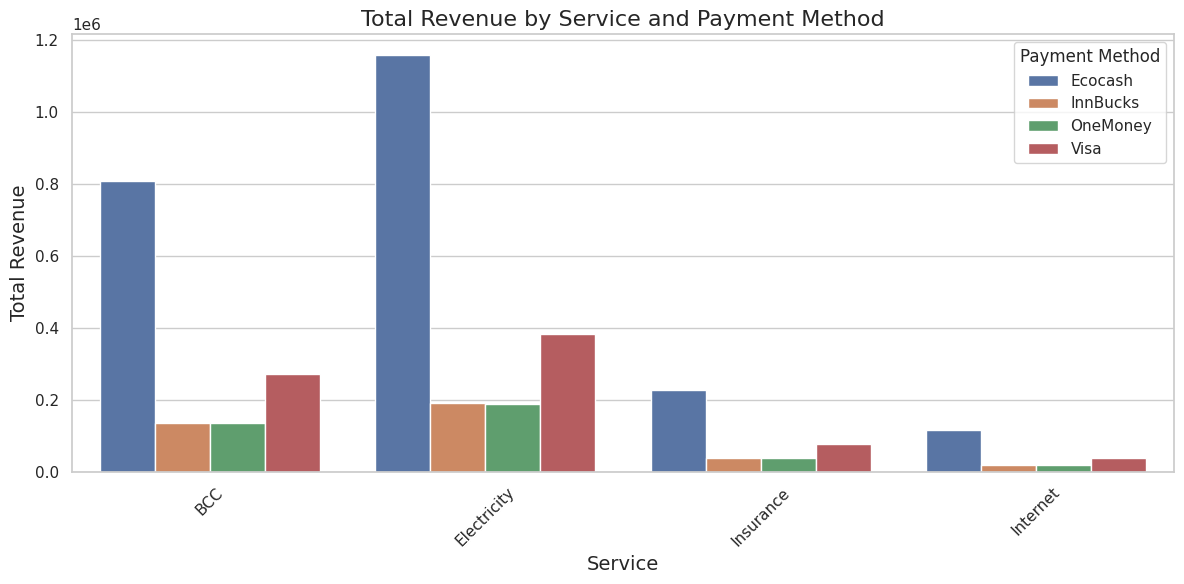

In [5]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a bar plot for total revenue by service
plt.figure(figsize=(12, 6))
revenue_plot = sns.barplot(data=revenue_analysis, x='service', y='amount', hue='payment_method')

# Adding titles and labels
plt.title('Total Revenue by Service and Payment Method', fontsize=16)
plt.xlabel('Service', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Payment Method')

# Show the plot
plt.tight_layout()
plt.show()

The bar chart illustrating the total revenue by service and payment method has been generated. This visualization helps us understand how different services contribute to overall revenue and which payment methods are most commonly used for each service

From the chart, we can observe the following:

* Electricity appears to generate the highest revenue, particularly through Ecocash and Visa.
* BCC also shows significant revenue, with Ecocash being a prominent payment method.
* Insurance and Internet services have lower revenue compared to Electricity and BCC, but they still show a diverse range of payment methods.

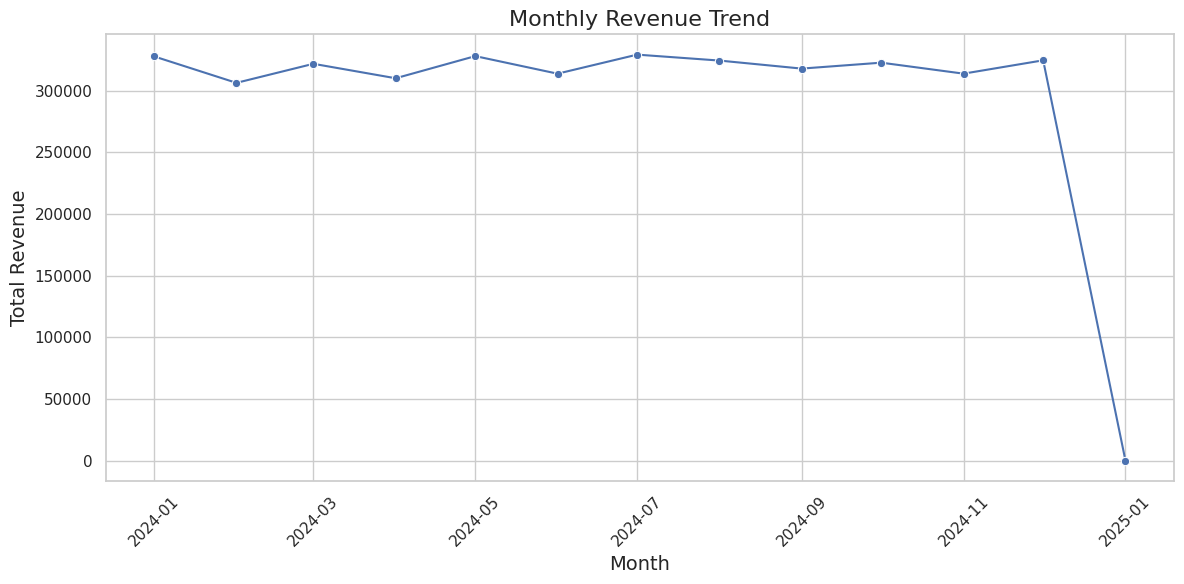

In [6]:
# Extracting month and year from the timestamp for time series analysis
transaction_data['month'] = transaction_data['timestamp'].dt.to_period('M')

# Grouping by month to calculate total revenue per month
monthly_revenue = transaction_data.groupby('month')['amount'].sum().reset_index()

# Convert month back to datetime for plotting
monthly_revenue['month'] = monthly_revenue['month'].dt.to_timestamp()

# Create a line plot for monthly revenue trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month', y='amount', marker='o')

# Adding titles and labels
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

The line chart illustrating the monthly revenue trend has been generated. This visualization allows us to observe how revenue has fluctuated over the year.

From the chart, we can analyze the following trends:

* There may be noticeable peaks and troughs in revenue, indicating seasonal variations or specific events that influenced sales.
* Identifying the months with the highest and lowest revenue can help in understanding customer behavior and planning for future marketing strategies.

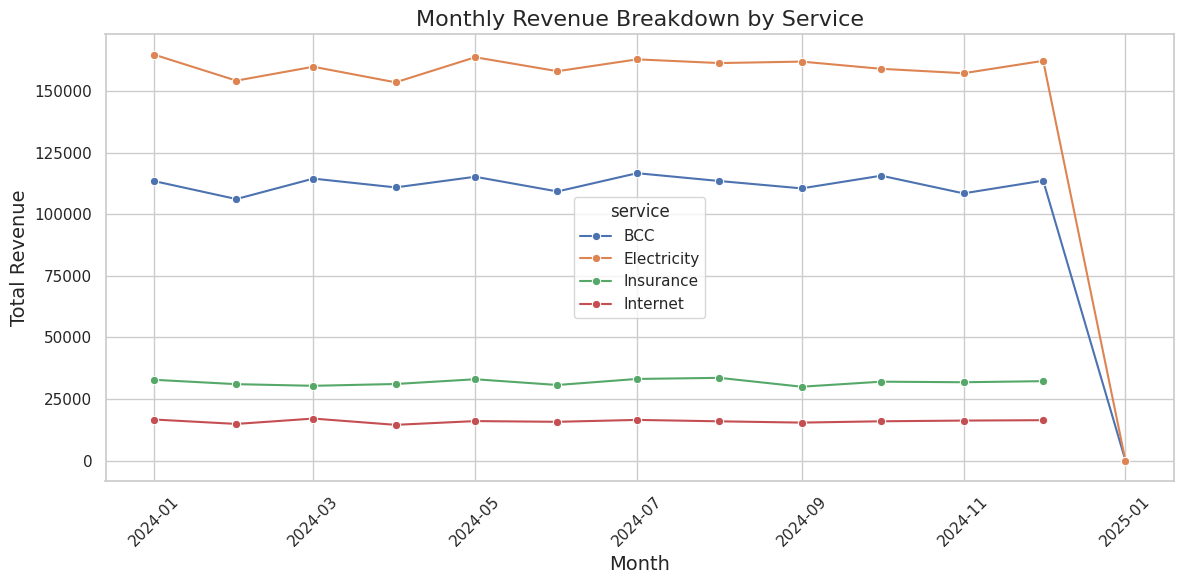

In [7]:
# Let's drill deeper into the monthly revenue analysis by breaking down the revenue by month and service.

# Grouping by month and service to calculate total revenue per month
monthly_service_revenue = transaction_data.groupby(['month', 'service'])['amount'].sum().reset_index()

# Convert month back to datetime for plotting
monthly_service_revenue['month'] = monthly_service_revenue['month'].dt.to_timestamp()

# Now let's visualize the monthly revenue breakdown by service to better understand the trends.

# Create a line plot for monthly revenue by service
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_service_revenue, x='month', y='amount', hue='service', marker='o')

# Adding titles and labels
plt.title('Monthly Revenue Breakdown by Service', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


We have drilled down into the monthly revenue analysis by breaking down the revenue for each service on a monthly basis. The results show the total revenue generated for each service across different months.

From the chart, we can observe the following:

* Electricity consistently generates the highest revenue across the months, indicating strong demand.
* BCC also shows significant revenue, with some fluctuations throughout the year.
* Insurance and Internet services have lower revenue compared to Electricity and BCC, but they still contribute to the overall revenue.

## Customer Analysis

In [8]:
# To perform a customer value analysis, we will first need to calculate the total revenue generated by each customer.

# Grouping by user_id to calculate total revenue per customer
customer_revenue = transaction_data.groupby('user_id')['amount'].sum().reset_index()

# Renaming the columns for clarity
customer_revenue.columns = ['user_id', 'total_revenue']

# Display the first few rows of the customer revenue analysis
customer_revenue.head()



,user_id,total_revenue
0,1,883.30
1,2,1052.63
2,3,719.28
3,4,790.63
4,5,733.45


In [9]:
# Now that we have the total revenue generated by each customer, we can analyze customer value by calculating metrics such as average revenue per user (ARPU) and identifying high-value customers.

# Calculate the average revenue per user (ARPU)
ARPU = customer_revenue['total_revenue'].mean()

# Identify high-value customers (e.g., top 10% of customers by revenue)
high_value_threshold = customer_revenue['total_revenue'].quantile(0.9)
high_value_customers = customer_revenue[customer_revenue['total_revenue'] >= high_value_threshold]

# Display the ARPU and high-value customers
ARPU, high_value_customers.head()

(np.float64(768.3927620000001),
     user_id  total_revenue
 1         2        1052.63
 7         8        1114.30
 12       13        1190.89
 23       24        1036.14
 37       38         972.32)

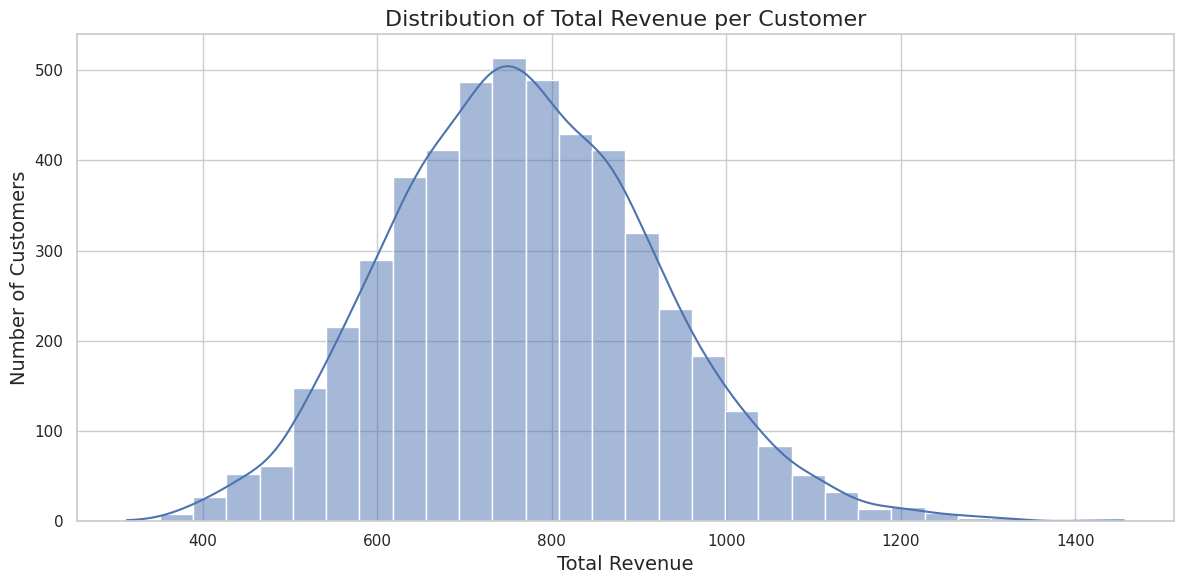

In [10]:
# Now let's visualize the distribution of total revenue among customers to better understand customer value.

plt.figure(figsize=(12, 6))
sns.histplot(customer_revenue['total_revenue'], bins=30, kde=True)

# Adding titles and labels
plt.title('Distribution of Total Revenue per Customer', fontsize=16)
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

We have conducted a customer value analysis by calculating the total revenue generated by each customer. The results show the total revenue for each user, which helps us identify high-value customers.

Next, we calculated the average revenue per user (ARPU), which is approximately $768. Additionally, we identified high-value customers, defined as those in the top 10% of total revenue.

From the histogram, we can observe the following:

* The distribution of total revenue is right-skewed, indicating that a small number of customers generate a significant portion of the total revenue.
* Most customers fall into the lower revenue brackets, while a few high-value customers contribute disproportionately to the overall revenue.

This analysis can help in targeting marketing efforts towards high-value customers and understanding customer segments that may require more attention.

In [11]:
# Creating bins for transaction amounts
bins = [0, 10, 20, 50, 100, float('inf')]
labels = ['Micro', 'Small', 'Medium', 'Large', 'Premium']

# Categorizing the transactions into bins
transaction_data['segment'] = pd.cut(transaction_data['amount'], bins=bins, labels=labels, right=False)

# Counting the number of transactions in each segment
segment_counts = transaction_data['segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Transaction Count']

# Calculating the average transaction amount per segment
average_transaction_per_segment = transaction_data.groupby('segment')['amount'].mean().reset_index()
average_transaction_per_segment.columns = ['Segment', 'Average Transaction']

# Merging the counts and averages for a comprehensive view
segment_analysis = pd.merge(segment_counts, average_transaction_per_segment, on='Segment')

# Displaying the segment analysis results
segment_analysis

<ipython-input-11-1246315173>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_transaction_per_segment = transaction_data.groupby('segment')['amount'].mean().reset_index()


,Segment,Transaction Count,Average Transaction
0,Medium,79401,29.181566
1,Small,69632,15.132086
2,Micro,13671,8.119157
3,Large,5746,60.661237
4,Premium,99,118.024141


<ipython-input-12-3206912002>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_analysis, x='Segment', y='Average Transaction', palette=colors)


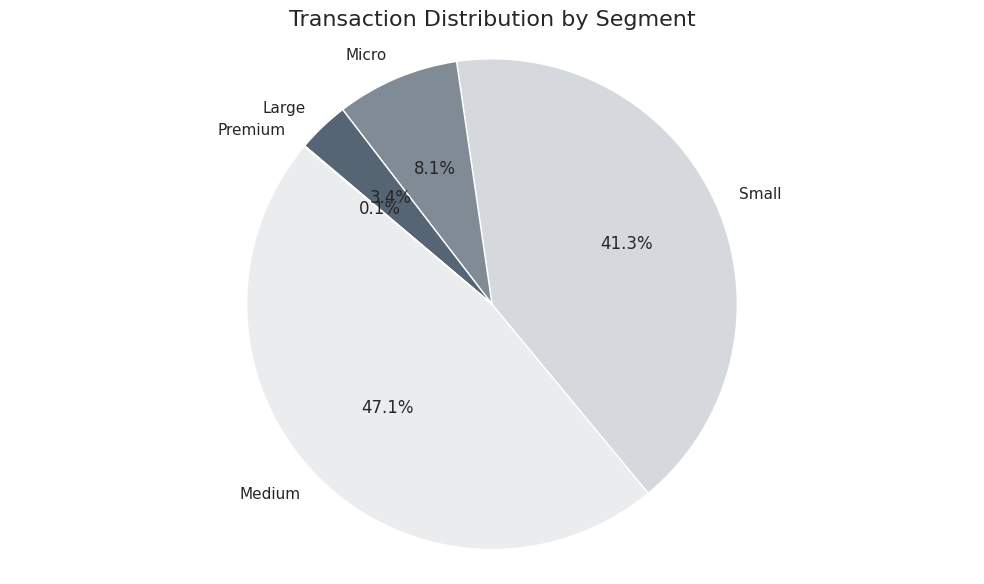

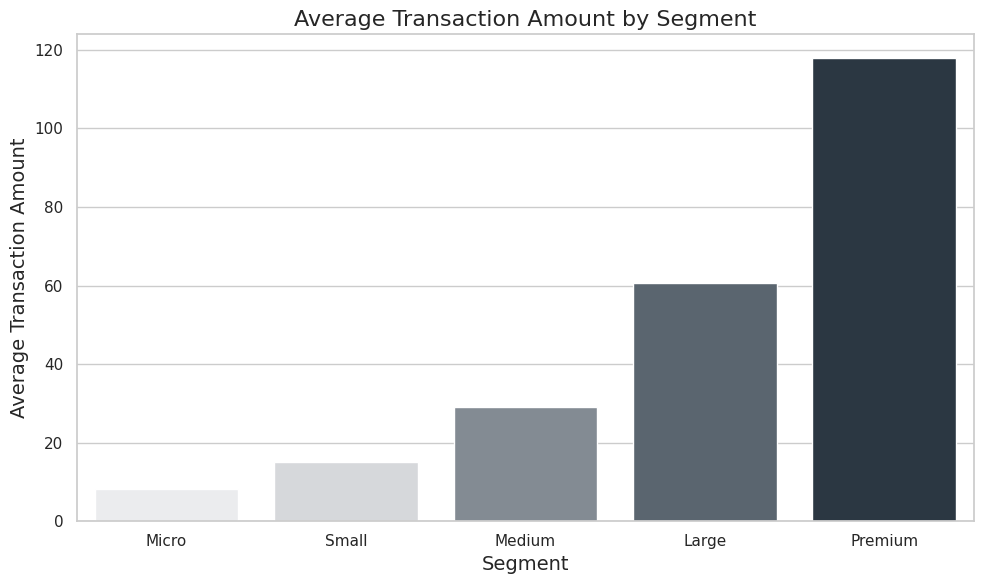

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a client-worthy color palette
colors = ['#eaecee', '#d5d8dc', '#808b96', '#566573', '#273746']

# Pie chart for transaction distribution
plt.figure(figsize=(10, 6))
plt.pie(segment_analysis['Transaction Count'], labels=segment_analysis['Segment'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Transaction Distribution by Segment', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Bar chart for average transaction amount per segment
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_analysis, x='Segment', y='Average Transaction', palette=colors)
plt.title('Average Transaction Amount by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Average Transaction Amount', fontsize=14)
plt.tight_layout()


* The pie chart shows the distribution of transactions across the segments, highlighting which segments are most prevalent.
* The bar chart indicates that while the Micro and Small segments have a high number of transactions, the Large and Premium segments have significantly higher average transaction amounts.

These insights can help in tailoring marketing strategies and understanding customer behavior across different spending categories

## Payments Analysis

In [13]:
# To perform a payments analysis, we will first analyze the payment methods used in the transactions.

# Grouping by payment method to calculate total revenue and transaction counts
payment_analysis = transaction_data.groupby('payment_method').agg(
    total_revenue=('amount', 'sum'),
    transaction_count=('transaction_id', 'count')
).reset_index()

# Sorting the results by total revenue
payment_analysis = payment_analysis.sort_values(by='total_revenue', ascending=False)

# Displaying the payment analysis results
payment_analysis


,payment_method,total_revenue,transaction_count
0,Ecocash,2306051.08,101187
3,Visa,772306.32,33889
2,OneMoney,381857.47,16710
1,InnBucks,381748.94,16763


<ipython-input-14-497845112>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_analysis, x='payment_method', y='total_revenue', palette='viridis')


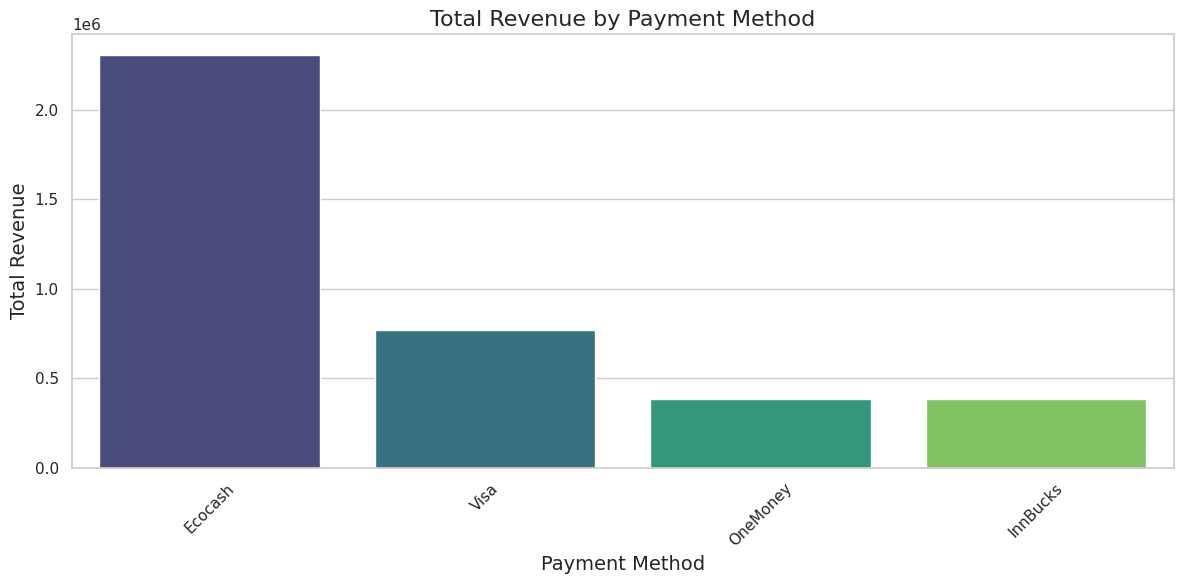

In [14]:
# Now that we have the payment analysis, let's visualize the total revenue by payment method using a bar chart.

plt.figure(figsize=(12, 6))
sns.barplot(data=payment_analysis, x='payment_method', y='total_revenue', palette='viridis')

# Adding titles and labels
plt.title('Total Revenue by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

* Ecocash is the leading payment method, generating the highest total revenue and having the most transactions.
* Visa follows as the second most significant payment method, with a substantial amount of revenue and transaction count.
* Other payment methods like OneMoney and InnBucks also contribute to the overall revenue but to a lesser extent.

This analysis can inform strategic decisions regarding payment method promotions and customer engagement strategies.

## Customer Behaviour Analysis

In [15]:
# For customer behavior analysis, we will look at three key metrics:
# 1. Customer Lifetime Value (CLV)
# 2. Average Order Value (AOV)
# 3. Purchase Frequency

# Calculating Customer Lifetime Value (CLV)
# CLV = Average Order Value (AOV) * Purchase Frequency * Customer Lifespan

# First, we need to calculate AOV and Purchase Frequency
# AOV = Total Revenue / Total Number of Orders
# Purchase Frequency = Total Number of Orders / Total Unique Customers

total_revenue = transaction_data['amount'].sum()
total_orders = transaction_data['transaction_id'].nunique()
total_customers = transaction_data['user_id'].nunique()

AOV = total_revenue / total_orders
purchase_frequency = total_orders / total_customers

# Assuming an average customer lifespan of 3 years for this analysis
customer_lifespan = 3
CLV = AOV * purchase_frequency * customer_lifespan

# Compiling the results into a summary dataframe
customer_behavior_metrics = pd.DataFrame({
    'Metric': ['Average Order Value (AOV)', 'Purchase Frequency', 'Customer Lifetime Value (CLV)'],
    'Value': [AOV, purchase_frequency, CLV]
})

# Displaying the customer behavior metrics
customer_behavior_metrics

,Metric,Value
0,Average Order Value (AOV),22.794344
1,Purchase Frequency,33.709800
2,Customer Lifetime Value (CLV),2305.178286


We have conducted a customer behavior analysis focusing on three key metrics:

* **Average Order Value (AOV)**: This metric represents the average amount spent by customers per order. The Average Order Value (AOV) is approximately 22.79, indicating the typical amount spent per transaction.
* **Purchase Frequency**: This indicates how often customers make purchases over a specific period. The Purchase Frequency is around 33.71, suggesting that customers make multiple purchases over time.
* **Customer Lifetime Value (CLV)**: This is an estimate of the total revenue a business can expect from a single customer account throughout their relationship.The Customer Lifetime Value (CLV) is estimated at 2305.17, highlighting the potential revenue from a customer throughout their relationship with the business.

These insights can help in strategizing marketing efforts, improving customer retention, and enhancing overall profitability.

## Conclusion

* We segmented the transactions by payment method and calculated total revenue and transaction counts. The results highlighted that Ecocash was the leading payment method, generating the highest revenue.
e calculated key metrics to understand customer behavior:
* Customers exhibit a healthy average order value and purchase frequency, indicating strong engagement.
* We calculated key metrics to understand customer behavior: Average Order Value (AOV): Approximately 22.79, Purchase Frequency: Around 33.71, Customer Lifetime Value (CLV): Estimated at 2305.18.
* These insights can guide strategic decisions in marketing, customer engagement, and payment method promotions to enhance overall business performance.